In [10]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

import modules.chapter_01 as chapter_01
from modules import common

importlib.reload(chapter_01)
importlib.reload(common)

print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Multiclass classification using Dense layers**

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype(np.float32) / 255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype(np.float32) / 255

indices = np.random.permutation(len(x_train))
x_train, y_train = x_train[indices], y_train[indices]

In [46]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(28 * 28,)),
        keras.layers.Dense(units=64, activation=tf.nn.relu),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(units=10, activation=tf.nn.softmax),
    ]
)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.001),
)

[]

In [50]:
filepath = "../resources/models/tmp/model.keras"
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_sparse_categorical_accuracy", patience=2),
    keras.callbacks.ModelCheckpoint(filepath=filepath, monitor="val_loss", save_best_only=True),
    keras.callbacks.TensorBoard(log_dir="../resources/logs/"),
]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    callbacks=callbacks,
    epochs=5,
    batch_size=512,
    verbose=False,
)

Metrics: 
loss, sparse_categorical_accuracy, val_loss, val_sparse_categorical_accuracy, 


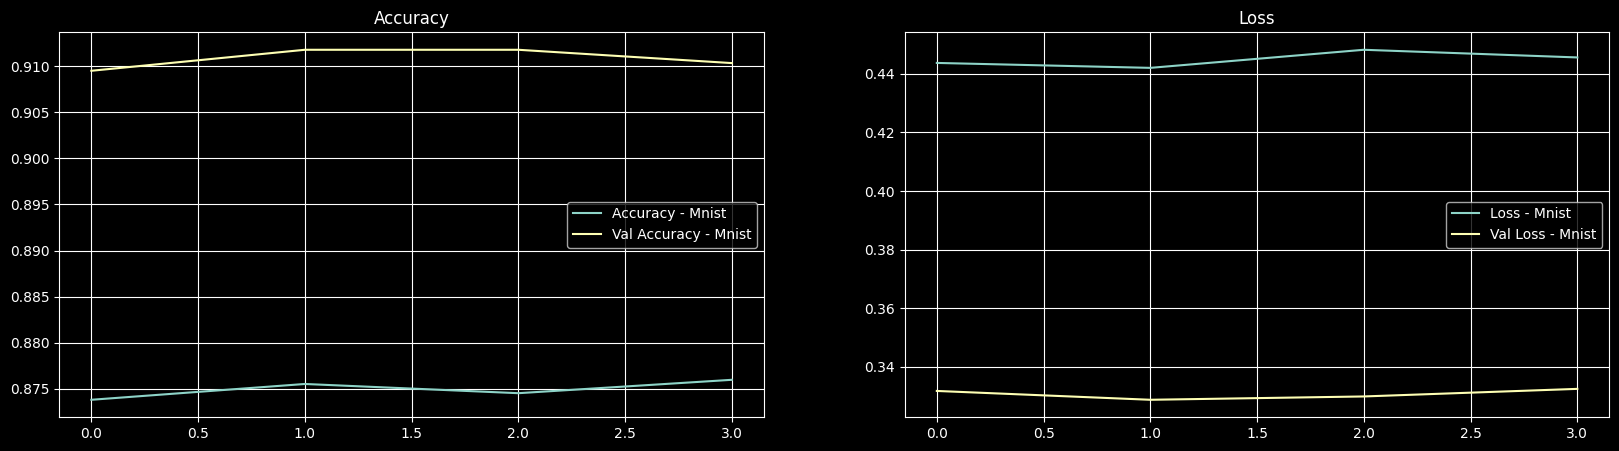

[0.0, 0.0]

In [51]:
common.plot(data=[history], labels=["Mnist"])
model.evaluate(x_test, verbose=False)

In [54]:
y_pred = model.predict(np.array([x_test[0]]), verbose=False)
print("Prediction: ", np.argmax(y_pred))
print("Ground: ", y_test[0])
print("Confidence: ", y_pred.max())

Prediction:  7
Ground:  7
Confidence:  0.9996618
